In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

import sys
sys.path.append("..")
from envs.data_handler import DataHandler

dh = DataHandler()
dh.data.head()

,Optimal_Affected_Component,Optimal_Failure,untransformed,cube,sqt,log10,ln,log2
0,Query Service,CF1,49.5,5.558599,13.105330,2.234896,5.146038,7.424164
1,User Management Service,CF2,16.0,4.920383,10.914362,2.075997,4.780159,6.896312
2,Authentication Service,CF3,31.5,4.920383,10.914362,2.075997,4.780159,6.896312
3,Bid and Buy Service,CF3,25.0,4.594071,9.846831,1.986593,4.574299,6.599319
4,Item Management Service,CF3,16.0,3.559606,6.715880,1.654206,3.808950,5.495153


# Data Transformation

In [2]:
# Cube Root Transformationn
data_cube = dh.data.apply(lambda x: np.power(x, (1/3)) if x.name == 'cube' else x)
# Square Root Transformation
data_sqt = dh.data.apply(lambda x: np.sqrt(x) if x.name == 'sqt' else x)
# Log10 Transformation
np.seterr(divide = 'ignore')
data_log10 = dh.data.apply(lambda x: np.log10(x) if x.name == 'log10' else x).replace([np.inf, -np.inf], 0)


/Users/rachel/Library/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/rachel/Library/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


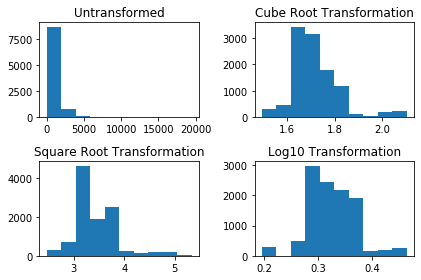

In [3]:
# analyzing historgams
fig = plt.figure()
ax1 = fig.add_subplot(221)
plt.hist(dh.data['untransformed'])
ax1.title.set_text('Untransformed')
ax2 = fig.add_subplot(222)
plt.hist(data_cube['cube'])
ax2.title.set_text('Cube Root Transformation')
ax3 = fig.add_subplot(223)
plt.hist(data_sqt['sqt'])
ax3.title.set_text('Square Root Transformation')
ax4 = fig.add_subplot(224)
plt.hist(data_log10['log10'])
ax4.title.set_text('Log10 Transformation')
plt.tight_layout()
plt.show()

# Comparison of the results

## Skewness

([<matplotlib.axis.XTick at 0x1a18fe1750>,
 <a list of 4 Text xticklabel objects>)

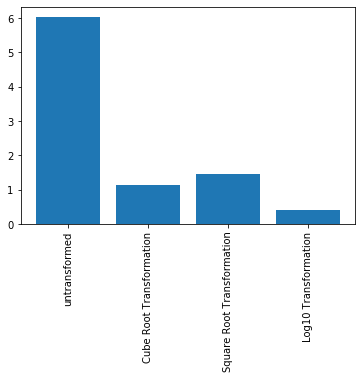

In [4]:
un_skew = dh.data['untransformed'].skew()
cub_skew = data_cube['cube'].skew()
sqt_skw = data_sqt['sqt'].skew()
log_skw = data_log10['log10'].skew()

labels = ['untransformed', 'Cube Root Transformation', 'Square Root Transformation', 'Log10 Transformation']
xticks = range(len(labels))

plt.bar(xticks, [un_skew, cub_skew, sqt_skw, log_skw])
plt.xticks(xticks, labels, rotation='vertical')

## Kurtosis

([<matplotlib.axis.XTick at 0x1a19067f50>,
 <a list of 4 Text xticklabel objects>)

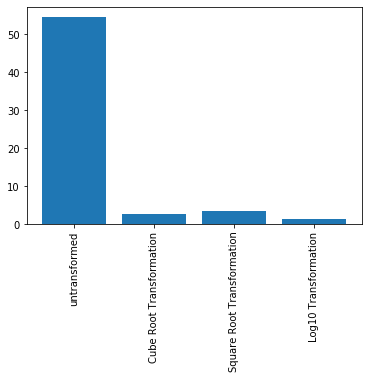

In [5]:
un_krt = dh.data['untransformed'].kurtosis()
cub_krt = data_cube['cube'].kurtosis()
sqt_krt = data_sqt['sqt'].kurtosis()
log_krt = data_log10['log10'].kurtosis()

labels = ['untransformed', 'Cube Root Transformation', 'Square Root Transformation', 'Log10 Transformation']
xticks = range(len(labels))

plt.bar(xticks, [un_krt, cub_krt, sqt_krt, log_krt])
plt.xticks(xticks, labels, rotation='vertical')

# Furhter Analyzing Ideas

In [6]:
# Kullback divergence / distance
#bins = np.arange(0,3.5,0.1)
#hist_untransformed = np.histogram(result_skw['untransformed'].values.tolist(), bins=bins)[0]
#hist_cube = np.histogram(result_skw['cube'].values.tolist(), bins=bins)[0]
#entropy(hist_untransformed, qk=hist_cube)